 \[lecture1\]-Summary 백본 네트워크 구조 상세분석
===
---

## 1-1. 들어가며
---

컴퓨터 비전 분야의 백본 네트워크 :: `AlexNet`, `VGG`, `ResNet` <br/>
`ResNet` -> `DenseNet`, `SENet` -> 네트워크 구조를 최적화 `NAS`(Neural Architecture Search)

## 1-2. 딥러닝 논문의 구조

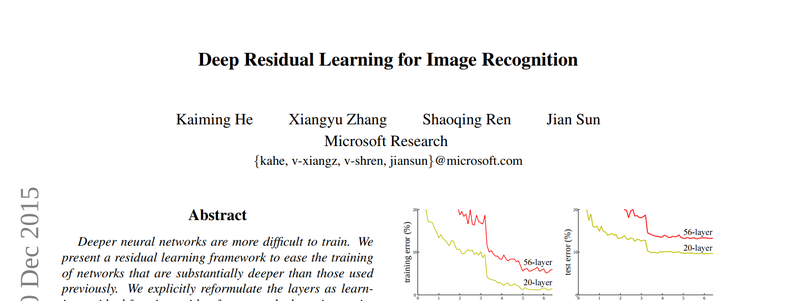
[참조 논문](https://arxiv.org/abs/1512.03385)

ResNet :: Residual Block 
=> 딥러닝 모델의 레이어가 깊어져도 안정적으로 학습되면서 모델 성능 개선까지 가능

논문 :: ResNet을 직접 구현하고 효과를 확인하였음

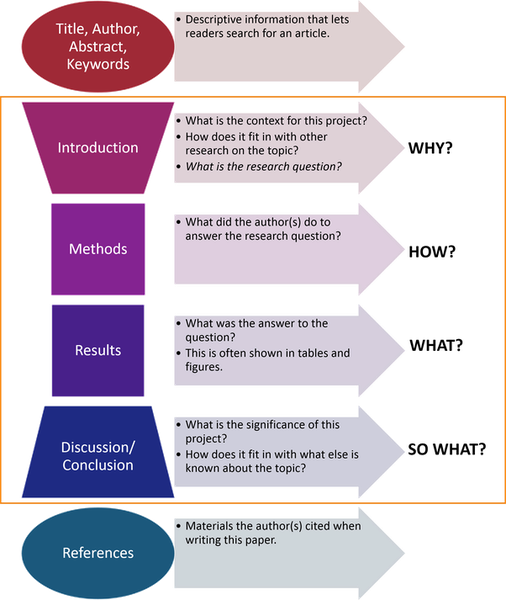

`초록(abstract)` : 아이디어를 제안하는 방식과 학계에 이 논문이 기여하는 점을 요약 <br/>
`서론(introduction)` : 일반적으로 제안하는 방법에 관한 이론 설명 <br/>
`실험(experiments)` : 제안하는 방법을 소개한 후 이 효과를 확인하기 위한 실험 <br/>
`결론(conclusion)` : 연구 내용 요약과 추가적인 연구방향을 소개 <br/>
`참고문헌(reference)`: 논문의 설명과 구현에 있어 인용한 논문들의 리스트가 소개 <br/>
`부록(appendix)` : 미처 본문에서 설명하지 못한 구현이나 또는 추가적인 실험 설명이 포함

논문의 논리구조
1) 이전까지의 연구가 해결하지 못했던 문제의식
2) 이 문제를 해결하기 위한 그동안의 다른 시도들
3) 이 문제에 대한 이 논문만의 독창적인 시도
4) 그러한 시도가 가져온 차별화된 성과

## 1-3. ResNet의 핵심개념과 그 효과

### 1) ResNet 논문의 문제의식
최초로 제기하는 질문 :: 딥러닝 모델의 레이어를 깊이 쌓으면 항상 성능이 좋아지는가?
- 레이어를 깊이 쌓으면 Vanishing / Exploding Gradient 문제가 발생하여 모델의 수렴을 방해하는 문제가 생김 => normalized initialization,  intermediate normalization layers을 통해 해결가능하다.

`Degradation Problem` :: 레이어를 깊이 쌓았을 때 모델이 수렴하고 있음에도 불구하고 발생하는 문제
- 딥러닝 모델의 레이어가 깊어졌을 때 모델이 수렴했음에도 불구하고 오히려 레이어 개수가 적을 때보다 모델의 training/test error가 더 커지는 현상이 발생하는데, 이것은 오버피팅 때문이 아니라 **네트워크 구조상 레이어를 깊이 쌓았을 때 최적화가 잘 안되기 때문에 발생하는 문제**이다.

### 2) ResNet 논문이 제시한 솔루션 : Residual Block

ResNet은 일종의 지름길("shortcut connection")을 통해서 레이어가 입력값을 직접 참조하도록 레이어를 변경했다. **Shortcut connection은 앞에서 입력으로 들어온 값을 네트워크의 출력층에 곧바로 더해주는데 구조를 활용한 것**이 `ResNet`이다.
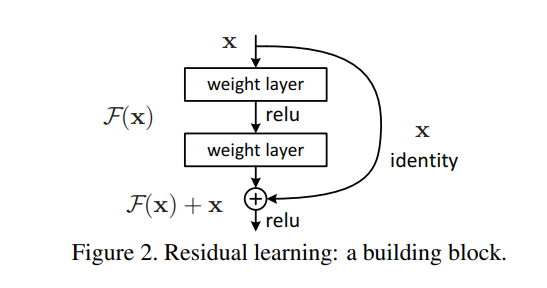

만들 당시의 생각 : F(x)가 Vanishing Gradient현상을 겪어 학습이 안되어 zero mapping이 될 수 있음. 최종 H(x)로 F(x)에 입력값 x를 더해주면 최소한 identity mapping이라도 될 것이니 성능이 저하되지 않을 것이다. 그런데 **F(x)를 나타내보면 H(x) - x**로 나타나게 되므로 **잔차의 모양**이 된다.

ResNet에서는 **shortcut connection을 가진 ResNet의 기본 블록**을 `Residual Block`이라고 부른다. 또한, **ResNet은 이러한 Residual Block 여러 개로 이루어진다.**

### 3) Experiments

18개 층과 34개 층을 갖는 네트워크를, 각각 shortcut이 없는 일반 네트워크(plain network)와 shortcut이 있는 ResNet 두 가지로 구현해 총 4가지를 만들었음

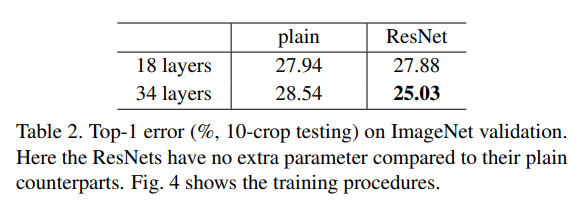
결과비교 사진

`Top-1 error`란 모델이 **가장 높은 확률값으로 예측한 class 1개가 정답과 일치하는지 보는 경우의 오류율**이다. Top-5는 모델이 예측한 값들 중 가장 높은 확률값부터 순서대로 5개 class 중 정답이 있는지를 보는 것이이다. 이 숫자는 당연히 낮을수록 좋다.

## 1-4. ResNet 이후 시도 (1) Connection을 촘촘히

### 1) Dense Connectivity
**ResNet의 shortcut connection을 마치 Fully Connected Layer처럼 촘촘히 가지도록 한다면 더욱 성능 개선 효과가 클 것이라고 생각**하고 이를 실험으로 입증하였다.

`Dense Connection` : <br/>
DenseNet의 기본 블록은 **L개의 레이어가 있을 때 레이어 간 L(L+1)/2개의 직접적인 연결(direct connection)을 만든다.**

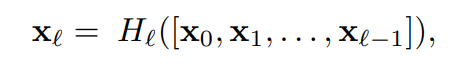

ResNet은 shortcut을 원소별로 단순히 더해주었던 반면, **DenseNet은 하나하나를 차원으로 쌓아서(concatenate) 하나의 텐서로 만들어 낸다는 사실**이 다르다. 또한, ResNet의 connection에 다른 연산이 없었던 것과 달리, **합성함수 $H_{l}$ 은 이 텐서에 대해 배치 정규화(batch normalization, BN), ReLU 활성화 함수, 그리고 3x3 컨볼루션 레이어를 통해서 pre-activation을 수행**한다.

### 2) Growth Rate

4개의 채널을 가진 CNN 레이어 4개를 DenseNet 블록으로 만들었을 때, 입력값의 채널 갯수가 4인 경우 블록 내 각 레이어의 입력값은 몇 개 채널을 가지게 될까?

첫 번째 레이어 입력값의 채널은 입력 데이터의 채널 그대로 4이다. 두 번째 레이어의 입력값은 입력 데이터의 채널값과, 첫 번째 레이어 출력값의 채널인 4을 더해 8이 된다. 그리고 세 번째 레이어는 입력 데이터의 채널 4와 첫 번째 레이어 출력값의 채널 4, 그리고 두 번째 레이어 출력값의 채널 4를 받아 12개의 특성 맵을 입력 받고, 네 번째 레이어는 같은 방식으로 16개의 특성 맵을 입력받는다.

진행될수록 특성맵의 크기가 커지는 것을 제한하기 위해서 논문에서는 growth rate이라는 값을 조정하여 레이어를 거치면서 증가하게 되는 채널의 갯수를 조절한다.

In [1]:
# Dense Block내의 각 레이어 output의 channel을 계산하는 함수
def get_channel_list():
    channel_list = []
    input_channel = 32
    growth_rate = 32
    for i in range(12):
        channel_list.append(input_channel + growth_rate*i)
    return channel_list

get_channel_list()

# 결과가 [32, 64, 96, 128, 160, 192, 224, 256, 288, 320, 352, 384] 이 나오면 정상적으로 구현된 것입니다.

[32, 64, 96, 128, 160, 192, 224, 256, 288, 320, 352, 384]

## 1-5. ResNet 이후 시도 (2) 어떤 특성이 중요할까?

`SENet` ::Squeeze-and-Excitation Networks

일반적인 CNN은 입력에 대해서 컨볼루션 필터를 필터 사이즈(filter size)에 따라 적용하는데 이때 필터의 갯수가 곧 컨볼루션 레이어 출력값의 채널 갯수가 된다.

### 1) Squeeze

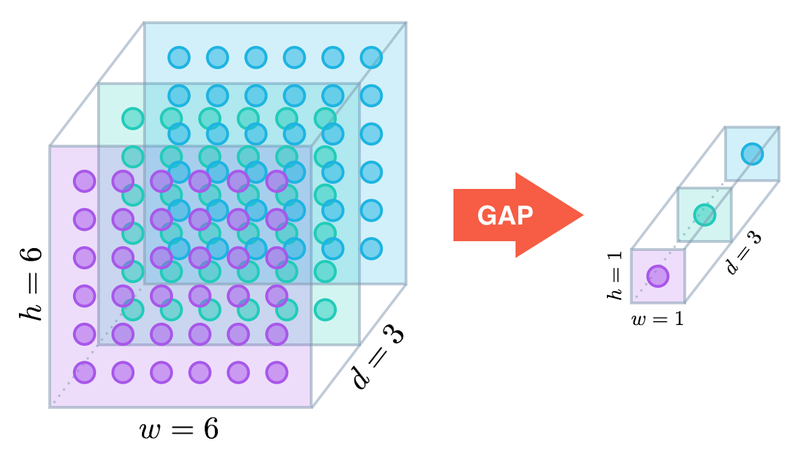

`Squeeze` 는 말 그대로 특성에서 **중요한 정보를 짜내는 과정 이를 풀링기법을 사용하여 진행**한다.

**각 채널별로 딱 1개의 숫자만 남도록 2D 특성맵 전체에 대해 평균값을 남기**는`global average pooling`을 수행하여 얻어진 **"1x1xC"의 벡터는 채널별 정보를 압축**해 담고 있다.


### 2) Excitate

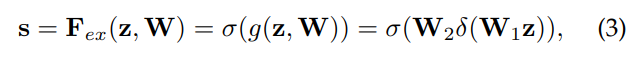
- $z$ 는 위에서 global average pooling을 적용한 특성, 즉 "squeeze" 활동의 결과물이다.
- 이 특성에 $W_{1}$ 을 곱해주는 linear 레이어를 거치고 ReLU 활성화 함수 $\sigma$를 거친다.
- 이후 두 번째 $W_{2}$ 곱해주는 linear layer를 거치고 마지막으로 시그모이드(sigmoid) 활성화 함수 $\sigma$을 거친다.

시그모이드를 사용하는 이유 :: 여러 채널들이 서로 다른 정도로 활성화되도록 하기 위함 <br/>
데이터셋에 정답 라벨이 하나뿐인 단순 분류 모델의 활성화 함수로는 소프트맥스(SoftMax)를 사용해서 단 하나의 최댓값을 찾지만, 하나의 대상에도 여러 개의 클래스의 정답 라벨을 지정할 수 있는 다중 라벨 분류(multi label classification)에서는 시그모이드를 사용하는 것과 같은 방식이다.


## 1-6. 모델 최적화하기 (1) Neural Architecture Search

`아키텍쳐 탐색(Architecture Search)` <br/>
모델 구조 자체를 최적화하려는 아이디어

`NAS(Neural Architecture Search)` <br/>
신경망을 사용해 모델의 구조를 탐색하는 방법

### 1) NASNet
딥러닝에서 모델을 탐색하기 위해 강화학습 모델이 대상 신경망의 구성(하이퍼파라미터)을 조정하면서 최적의 성능을 내도록 하는 방법이 제안되었으며, NASNet은 그 중 하나이다.

#### 방법
아키텍쳐 탐색을 하는 동안 강화학습 모델은 대상 신경망의 구성을 일종의 변수로 조정하면서 최적의 성능을 내도록 한다. 우리가 지금까지 보아왔던 레이어의 세부 구성, CNN의 필터 크기, 채널의 개수, connection 등이 조정할 수 있는 변수가 된다.

`탐색 공간(search space)`: **네트워크 구성에 대한 요소들을 조합할 수 있는 범위**


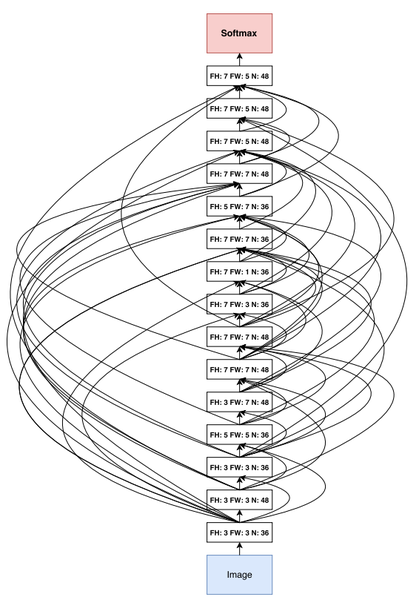

### 2) Convolution cell
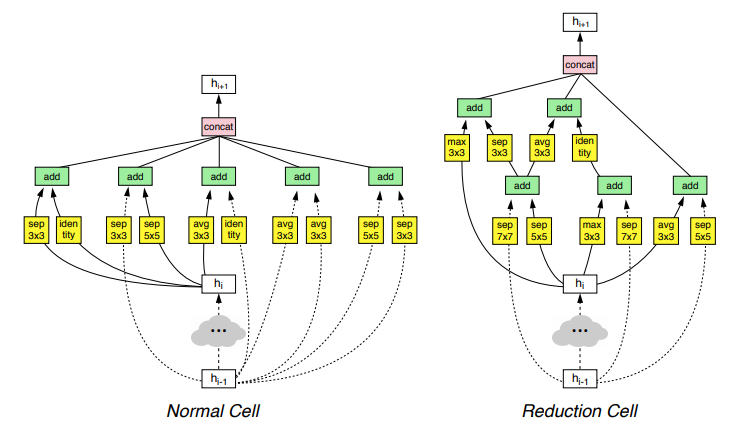

NASNet 논문에서는 탐색공간을 줄이기 위해서 모듈(cell) 단위의 최적화를 하고 그 모듈을 조합하는 방식을 채택하였다.

Convolution cell은 `normal cell`과 `reduction cell`로 구분된다.

- `normal cell` : 특성 맵의 가로, 세로가 유지되도록 stride를 1로 고정한다.
- `reduction cell` : stride를 1 또는 2로 가져가서 특성 맵의 크기가 줄어들 수 있도록 한다.

 **normal cell과 reduction cell 내부만을 최적화하여 두 가지 cell을 조합해 것이 최종 결과 네트워크(NASNet)를 만들어 좀 더 적은 연산과 가중치로 SOTA(state-of-the-art) 성능을 기록**했다.

## 1-7. 모델 최적화하기 (2) EfficientNet
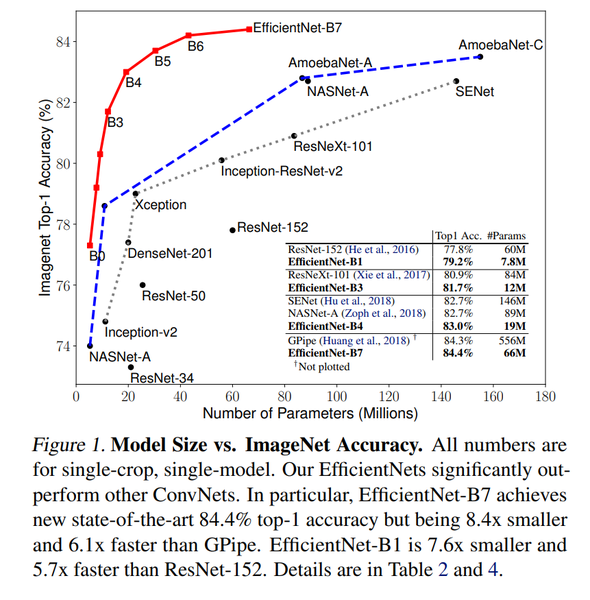

정확도를 얻는 데 다른 네트워크들은 무지막지한 파라미터의 수를 사용한 반면 `EfficientNet`은 **작고 효율적인 네트워크를 사용**했다.

### Compound scaling

resolution, depth, width를 최적으로 조정하기 위해서 앞선 NAS와 유사한 방법을 사용해 기본 모델(baseline network)의 구조를 미리 찾고 고정해둔다. 모델의 구조가 고정이 되면 효율적인 모델을 찾는다는 커다란 문제가, 개별 레이어의 resolution, depth, width 를 조절해 기본 모델을 적절히 확장시키는 문제로 단순화된다.

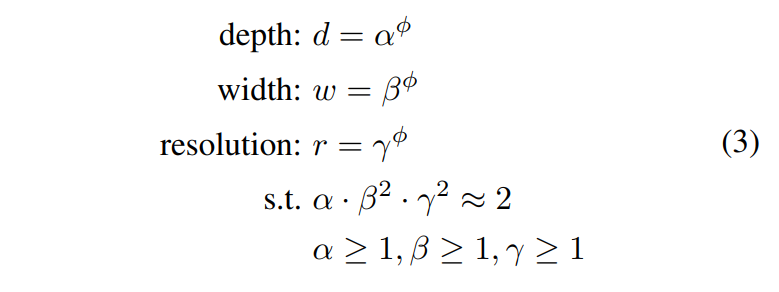

resolution, depth, width라는 세 가지 "scaling factor"를 동시에 고려하는 compound scaling을 제안한다. compound coefficient $\phi$는 모델의 크기를 조정하기 위한 계수가 된다. 
위 식을 통해 레이어의 resolution, depth, width를 각각 조정하는 것이 아니라 고정된 계수 에 따라서 변하도록 하면 보다 일정한 규칙에 따라(in a principled way) 모델의 구조가 조절되도록 할 수 있다.

$\phi$ 를 1로 고정한뒤 resolution과 depth, width을 정하는 $\alpha, \beta, \gamma$의 최적값을 찾고,  $\alpha, \beta, \gamma$ 즉 resolution과 depth, width의 기본 배율을 고정한 뒤 compound coefficient $\phi$ 를 조정하여 모델의 크기를 조정한다.